In [1]:
## Libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

## Matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

## Sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

## Plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pylab

## NetworkX
import networkx as nx

## Community Detection
import community as community_louvain
from collections import Counter, defaultdict

## Scipy
from scipy.stats import skew, kurtosis

## IPython
from IPython.display import display, HTML
import sys
from pathlib import Path

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/Users/seungji/Library/Mobile Documents/com~apple~CloudDocs/DU/Term3/Dissertation/Data/iFood/ml_project1_data.csv')
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09-04       58       635         88              546   
1            1  2014-03-08       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-02-10       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-06-10       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Missing Value & Duplicated value

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
print(df[df['Income'].isnull()])

         ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Gra

In [8]:
df = df.dropna()
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
dups = df.duplicated()
dup_count = dups.sum()
print(dup_count)

0


In [10]:
print(df['Z_CostContact'].nunique())
print(df['Z_Revenue'].nunique())

1
1


In [11]:
df = df.drop('Z_CostContact', axis=1)
df = df.drop('Z_Revenue',axis=1)
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09-04       58       635         88              546   
1            1  2014-03-08       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-02-10       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-06-10       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

## Outliers

In [12]:
fig = go.Figure()

excluded_columns = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

for col in df:
    if col not in excluded_columns:
        fig.add_trace(go.Box(y=df[col].values, name=df[col].name))

fig.update_layout(width=700, height=400, showlegend=False)
fig.show()

In [13]:
fig = go.Figure()

excluded_columns = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Income']

for col in df:
    if col not in excluded_columns:
        fig.add_trace(go.Box(y=df[col].values, name=df[col].name))

fig.update_layout(width=700, height=400, showlegend=False)
fig.show()

In [14]:
fig = go.Figure()

excluded_columns = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Income', 'MntWines', 'MntMeatProducts']

for col in df:
    if col not in excluded_columns:
        fig.add_trace(go.Box(y=df[col].values, name=df[col].name))

fig.update_layout(width=700, height=400, showlegend=False)
fig.show()

In [15]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]
pd.DataFrame(outliers)

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
164    8475        1973         PhD        Married  157243.0        0   
617    1503        1976         PhD       Together  162397.0        1   
655    5555        1975  Graduation       Divorced  153924.0        0   
687    1501        1982         PhD        Married  160803.0        0   
1300   5336        1971      Master       Together  157733.0        1   
1653   4931        1977  Graduation       Together  157146.0        0   
2132  11181        1949         PhD        Married  156924.0        0   
2233   9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
164          1  2014-03-01       98        20          2             1582   
617          1  2013-06-03       31        85          1               16   
655          0  2014-02-07       81         1          1                1   
687          0  2012-08-04       21        55         16             1622   
1300         0  2013-06-04       37        39          1                9   
1653         0  2013-04-29       13         1          0             1725   
2132         0  2013-08-29       85         2          1                2   
2233         0  2013-06-02       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
164                 1                 2             1                 15   
617                 2                 1             2                  0   
655                 1                 1             1                  0   
687                17                 3             4                 15   
1300                2                 0             8                  0   
1653                2                 1             1                  0   
2132                1                 1             1                  0   
2233                8                 1            12                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
164                 0                   22                  0   
617                 0                    0                  1   
655                 0                    0                  0   
687                 0                   28                  1   
1300                1                    0                  1   
1653                0                   28                  0   
2132                0                    0                  0   
2233                3                    1                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
164                   0             0             0             0   
617                   1             0             0             0   
655                   0             0             0             0   
687                   0             0             0             0   
1300                  1             0             0             0   
1653                  1             0             0             0   
2132                  0             0             0             0   
2233                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
164              0             0         0         0  
617              0             0         0         0  
655              0             0         0         0  
687              0             0         0         0  
1300             0             0         0         0  
1653             0             0         0         0  
2132             0             0         0         0  
2233             0             0         0         0

In [16]:
df = df[~(df['ID']==9432)]
print(df.shape)

(2215, 27)


## Categorical Data

### Education, Marital_Status

In [17]:
print(df['Education'].value_counts(), '\n')
print(df['Marital_Status'].value_counts())

Education
Graduation    1115
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64 

Marital_Status
Married     857
Together    572
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [18]:
# 2n Cycle > Master
# Divorced, Widow, ALone, Absurd, YOLO > Single

df['Education'] = df['Education'].replace(['2n Cycle'], 'Master')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')

print(df['Education'].value_counts(), '\n')
print(df['Marital_Status'].value_counts())

Education
Graduation    1115
Master         565
PhD            481
Basic           54
Name: count, dtype: int64 

Marital_Status
Married     857
Single      786
Together    572
Name: count, dtype: int64


In [19]:
enc = OrdinalEncoder(categories=[sorted(df['Education'].unique()), ['Single', 'Together', 'Married']])
df[['Education', 'Marital_Status']] = enc.fit_transform(df[['Education', 'Marital_Status']])

print(enc.categories_)

[array(['Basic', 'Graduation', 'Master', 'PhD'], dtype=object), array(['Single', 'Together', 'Married'], dtype=object)]


### Dt_Customer

In [20]:
df['Dt_Customer'].head()

0    2012-09-04
1    2014-03-08
2    2013-08-21
3    2014-02-10
4    2014-01-19
Name: Dt_Customer, dtype: object

In [21]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True, format='%Y-%m-%d', infer_datetime_format=True)
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year
df['Dt_Customer_Month'] = df['Dt_Customer'].dt.month
df = df.drop('Dt_Customer', axis=1)
df.head()

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957        1.0             0.0  58138.0        0         0   
1  2174        1954        1.0             0.0  46344.0        1         1   
2  4141        1965        1.0             1.0  71613.0        0         0   
3  6182        1984        1.0             1.0  26646.0        1         0   
4  5324        1981        3.0             2.0  58293.0        1         0   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   Dt_Customer_Year  Dt_Customer_Month  
0              2012                  9  
1              2014                  3  
2              2013                  8  
3              2014                  2  
4              2014                  1

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2215 non-null   int64  
 1   Year_Birth           2215 non-null   int64  
 2   Education            2215 non-null   float64
 3   Marital_Status       2215 non-null   float64
 4   Income               2215 non-null   float64
 5   Kidhome              2215 non-null   int64  
 6   Teenhome             2215 non-null   int64  
 7   Recency              2215 non-null   int64  
 8   MntWines             2215 non-null   int64  
 9   MntFruits            2215 non-null   int64  
 10  MntMeatProducts      2215 non-null   int64  
 11  MntFishProducts      2215 non-null   int64  
 12  MntSweetProducts     2215 non-null   int64  
 13  MntGoldProds         2215 non-null   int64  
 14  NumDealsPurchases    2215 non-null   int64  
 15  NumWebPurchases      2215 non-null   int64 

### Children

In [23]:
# Children = Kidhome + Teenhome

df['Children'] = df['Kidhome'] + df['Teenhome']
df = df.drop(columns = ['Kidhome', 'Teenhome'], axis=1)
df

ID  Year_Birth  Education  Marital_Status   Income  Recency  \
0      5524        1957        1.0             0.0  58138.0       58   
1      2174        1954        1.0             0.0  46344.0       38   
2      4141        1965        1.0             1.0  71613.0       26   
3      6182        1984        1.0             1.0  26646.0       26   
4      5324        1981        3.0             2.0  58293.0       94   
...     ...         ...        ...             ...      ...      ...   
2235  10870        1967        1.0             2.0  61223.0       46   
2236   4001        1946        3.0             1.0  64014.0       56   
2237   7270        1981        1.0             0.0  56981.0       91   
2238   8235        1956        2.0             1.0  69245.0        8   
2239   9405        1954        3.0             2.0  52869.0       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0               88                  3                8                   10   
1                6                  2                1                    1   
2               42                  1                8                    2   
3                5                  2                2                    0   
4               15                  5                5                    3   
...            ...                ...              ...                  ...   
2235           247                  2                9                    3   
2236             8                  7                8                    2   
2237            24                  1                2                    3   
2238            61                  2                6                    5   
2239            21                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0                0             0             0         0         1   
1                0             0             0         0         0   
2                0             0             0         0         0   
3                0             0             0       

In [24]:
df = df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Children',
       'Dt_Customer_Year', 'Dt_Customer_Month', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Complain', 'Response']]

In [25]:
df.head()

ID  Year_Birth  Education  Marital_Status   Income  Children  \
0  5524        1957        1.0             0.0  58138.0         0   
1  2174        1954        1.0             0.0  46344.0         2   
2  4141        1965        1.0             1.0  71613.0         0   
3  6182        1984        1.0             1.0  26646.0         1   
4  5324        1981        3.0             2.0  58293.0         1   

   Dt_Customer_Year  Dt_Customer_Month  Recency  MntWines  MntFruits  \
0              2012                  9       58       635         88   
1              2014                  3       38        11          1   
2              2013                  8       26       426         49   
3              2014                  2       26        11          4   
4              2014                  1       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp5  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2215 non-null   int64  
 1   Year_Birth           2215 non-null   int64  
 2   Education            2215 non-null   float64
 3   Marital_Status       2215 non-null   float64
 4   Income               2215 non-null   float64
 5   Children             2215 non-null   int64  
 6   Dt_Customer_Year     2215 non-null   int32  
 7   Dt_Customer_Month    2215 non-null   int32  
 8   Recency              2215 non-null   int64  
 9   MntWines             2215 non-null   int64  
 10  MntFruits            2215 non-null   int64  
 11  MntMeatProducts      2215 non-null   int64  
 12  MntFishProducts      2215 non-null   int64  
 13  MntSweetProducts     2215 non-null   int64  
 14  MntGoldProds         2215 non-null   int64  
 15  NumDealsPurchases    2215 non-null   int64 

## Exploratory Data Analysis (EDA)

### 1. Year_Birth

In [27]:
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.1)

fig.add_trace(px.histogram(df, 'Year_Birth', nbins=20).data[0], row=1, col=1)
fig.add_trace(px.box(df, 'Year_Birth').data[0], row=1, col=2)
fig.update_layout(width=1300, height=400, title_text="<b>Year_Birth</b>")

fig.show()

df['Year_Birth'].describe()

count    2215.000000
mean     1968.816704
std        11.987000
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

### 2. Education & 3. Marital_Status

In [28]:
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.10, subplot_titles=('<b>Education</b>', '<b>Marital_Status</b>'))

fig.add_trace(px.histogram(df, 'Education').data[0], row=1, col=1)
fig.add_trace(px.histogram(df, 'Marital_Status').data[0], row=1, col=2)
fig.update_layout(width=1300, height=400, bargap=0.3)
fig.update_xaxes(type='category', categoryorder='category ascending', row=1, col=2)

fig.show()

print(df['Education'].value_counts().sort_index(), '\n')
# 'Basic', 'Graduation', 'Master', 'PhD'

print(df['Marital_Status'].value_counts().sort_index())
# 'Single', 'Together', 'Married'

Education
0.0      54
1.0    1115
2.0     565
3.0     481
Name: count, dtype: int64 

Marital_Status
0.0    786
1.0    572
2.0    857
Name: count, dtype: int64


### 4. Income

In [29]:
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.1)

fig.add_trace(px.histogram(df, 'Income', nbins=20).data[0], row=1, col=1)
fig.add_trace(px.box(df, 'Income').data[0], row=1, col=2)
fig.update_layout(width=1300, height=400, title_text="<b>Income</b>")

fig.show()

df['Income'].describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

### 5. Children

In [30]:
fig = px.histogram(df, 'Children')
fig.update_layout(width=700, height=400, bargap=0.3)

print(df['Children'].value_counts().mean(), '\n')
print(df['Children'].value_counts().sort_index())

553.75 

Children
0     633
1    1116
2     416
3      50
Name: count, dtype: int64


### 6. Dt_Customer_Year & 7. Dt_Customer_Month

In [31]:
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.10, subplot_titles=('<b>Dt_Customer_Year</b>', '<b>Dt_Customer_Month</b>'))

fig.add_trace(px.histogram(df, 'Dt_Customer_Year').data[0], row=1, col=1)
fig.add_trace(px.histogram(df, 'Dt_Customer_Month').data[0], row=1, col=2)
fig.update_layout(width=1300, height=400, bargap=0.3)
fig.update_xaxes(type='category', categoryorder='category ascending', row=1, col=1)
fig.update_xaxes(dtick=1, row=1, col=2)

fig.show()

print(df['Dt_Customer_Year'].value_counts().sort_index(), '\n')
print(df['Dt_Customer_Month'].value_counts().sort_index())

Dt_Customer_Year
2012     490
2013    1172
2014     553
Name: count, dtype: int64 

Dt_Customer_Month
1     195
2     177
3     209
4     181
5     213
6     162
7     100
8     219
9     191
10    210
11    183
12    175
Name: count, dtype: int64


### 8. Recency

In [32]:
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.1)

fig.add_trace(px.histogram(df, 'Recency', nbins=20).data[0], row=1, col=1)
fig.add_trace(px.box(df, 'Recency').data[0], row=1, col=2)
fig.update_layout(width=1300, height=400, title_text="<b>Recency</b>")

fig.show()

df['Recency'].describe()

count    2215.000000
mean       49.024379
std        28.949608
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

### 9-14. MntWines / Fruits / MeatProducts / FishProducts / SweetProducts / GoldProds

In [33]:
fig = make_subplots(rows=2, cols=3, horizontal_spacing=0.1, subplot_titles=('<b>MntWines</b>', '<b>MntFruits</b>', '<b>MntMeatProducts</b>', '<b>MntFishProducts</b>', '<b>MntSweetProducts</b>', '<b>MntGoldProds</b>'))

fig.add_trace(px.histogram(df, 'MntWines').data[0], row=1, col=1)
fig.add_trace(px.histogram(df, 'MntFruits').data[0], row=1, col=2)
fig.add_trace(px.histogram(df, 'MntMeatProducts').data[0], row=1, col=3)
fig.add_trace(px.histogram(df, 'MntFishProducts').data[0], row=2, col=1)
fig.add_trace(px.histogram(df, 'MntSweetProducts').data[0], row=2, col=2)
fig.add_trace(px.histogram(df, 'MntGoldProds').data[0], row=2, col=3)

fig.update_layout(width=1300, height=500, bargap=0.1)

fig.show()

print('* Mntwines')
print(df['MntWines'].describe(), '\n')

print('* MntFruits')
print(df['MntFruits'].describe(), '\n')

print('* MntMeatProducts')
print(df['MntMeatProducts'].describe(), '\n')

print('* MntFishProducts')
print(df['MntFishProducts'].describe(), '\n')

print('* MntSweetProducts')
print(df['MntSweetProducts'].describe(), '\n')

print('* MntGoldProds')
print(df['MntGoldProds'].describe())

* Mntwines
count    2215.000000
mean      305.225282
std       337.345380
min         0.000000
25%        24.000000
50%       175.000000
75%       505.000000
max      1493.000000
Name: MntWines, dtype: float64 

* MntFruits
count    2215.000000
mean       26.361625
std        39.802036
min         0.000000
25%         2.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64 

* MntMeatProducts
count    2215.000000
mean      167.063205
std       224.311559
min         0.000000
25%        16.000000
50%        68.000000
75%       232.500000
max      1725.000000
Name: MntMeatProducts, dtype: float64 

* MntFishProducts
count    2215.000000
mean       37.651016
std        54.760822
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64 

* MntSweetProducts
count    2215.000000
mean       27.040632
std        41.077594
min         0.000000
25%         1.00000

### 15 - 18. NumDealsPurchases / WebPurchases / CatalogPurchases / StorePurchases

In [34]:
fig = make_subplots(rows=2, cols=2, horizontal_spacing=0.1, subplot_titles=('<b>NumDealsPurchases</b>', '<b>NumWebPurchases</b>', '<b>NumCatalogPurchases</b>', '<b>NumStorePurchases</b>'))

fig.add_trace(px.histogram(df, 'NumDealsPurchases').data[0], row=1, col=1)
fig.add_trace(px.histogram(df, 'NumWebPurchases').data[0], row=1, col=2)
fig.add_trace(px.histogram(df, 'NumCatalogPurchases').data[0], row=2, col=1)
fig.add_trace(px.histogram(df, 'NumStorePurchases').data[0], row=2, col=2)

fig.update_layout(width=1300, height=500, bargap=0.1)

fig.show()

print('* NumDealsPurchases')
print(df['NumDealsPurchases'].describe(), '\n')

print('* NumWebPurchases')
print(df['NumWebPurchases'].describe(), '\n')

print('* NumCatalogPurchases')
print(df['NumCatalogPurchases'].describe(), '\n')

print('* NumStorePurchases')
print(df['NumStorePurchases'].describe(), '\n')

* NumDealsPurchases
count    2215.000000
mean        2.322799
std         1.923820
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64 

* NumWebPurchases
count    2215.000000
mean        4.085779
std         2.741473
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64 

* NumCatalogPurchases
count    2215.000000
mean        2.671783
std         2.927179
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64 

* NumStorePurchases
count    2215.000000
mean        5.802257
std         3.250974
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64 



### 19. NumWebVisitsMonth

In [35]:
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.1)

fig.add_trace(px.histogram(df, 'NumWebVisitsMonth').data[0], row=1, col=1)
fig.add_trace(px.box(df, 'NumWebVisitsMonth').data[0], row=1, col=2)
fig.update_layout(width=1300, height=400, title_text="<b>NumWebVisitsMonth</b>", bargap=0.1)
fig.update_xaxes(dtick=1, row=1, col=1)
fig.show()

df['NumWebVisitsMonth'].describe()

count    2215.000000
mean        5.318736
std         2.425863
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

### 20 - 24. AcceptedCmp1-5

In [36]:
df_AcceptedCmp2 = df[['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
df_AcceptedCmp2['AcceptedCmp'] = ''

def concatenate_accepted_cmp(row):
    accepted_cmp_list = []
    if row['AcceptedCmp1'] == 1:
        accepted_cmp_list.append('Cmp1')
    if row['AcceptedCmp2'] == 1:
        accepted_cmp_list.append('Cmp2')
    if row['AcceptedCmp3'] == 1:
        accepted_cmp_list.append('Cmp3')
    if row['AcceptedCmp4'] == 1:
        accepted_cmp_list.append('Cmp4')
    if row['AcceptedCmp5'] == 1:
        accepted_cmp_list.append('Cmp5')
    return ', '.join(accepted_cmp_list)

df_AcceptedCmp2['AcceptedCmp'] = df_AcceptedCmp2.apply(concatenate_accepted_cmp, axis=1)
df_AcceptedCmp2['AcceptedCmp'].replace('', 'Cmp0', inplace=True)

df_AcceptedCmp2.head(20)

ID  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
0   5524             0             0             0             0   
1   2174             0             0             0             0   
2   4141             0             0             0             0   
3   6182             0             0             0             0   
4   5324             0             0             0             0   
5   7446             0             0             0             0   
6    965             0             0             0             0   
7   6177             0             0             0             0   
8   4855             0             0             0             0   
9   5899             0             0             1             0   
11   387             0             0             0             0   
12  2125             0             0             0             0   
13  8180             0             0             0             0   
14  2569             0             0             0             0   
15  2114             1             0             0             0   
16  9736             0             0             0             0   
17  4939             0             0             0             0   
18  6565             1             0             0             0   
19  2278             0             0             0             0   
20  9360             0             0             0             0   

    AcceptedCmp5 AcceptedCmp  
0              0        Cmp0  
1              0        Cmp0  
2              0        Cmp0  
3              0        Cmp0  
4              0        Cmp0  
5              0        Cmp0  
6              0        Cmp0  
7              0        Cmp0  
8              0        Cmp0  
9              0        Cmp3  
11             0        Cmp0  
12             0        Cmp0  
13             0        Cmp0  
14             0        Cmp0  
15             1  Cmp1, Cmp5  
16             0        Cmp0  
17             0        Cmp0  
18             0        Cmp1  
19             0        Cmp0  
20             0        Cmp0

In [37]:
df_AcceptedCmp2['AcceptedCmp'].value_counts().sort_index()

AcceptedCmp
Cmp0                      1756
Cmp1                        52
Cmp1, Cmp2, Cmp3, Cmp5       3
Cmp1, Cmp2, Cmp4             2
Cmp1, Cmp2, Cmp4, Cmp5       8
Cmp1, Cmp3                   8
Cmp1, Cmp3, Cmp5            13
Cmp1, Cmp4                  12
Cmp1, Cmp4, Cmp5            23
Cmp1, Cmp5                  21
Cmp2                         1
Cmp2, Cmp3                   2
Cmp2, Cmp3, Cmp5             2
Cmp2, Cmp4                   8
Cmp2, Cmp4, Cmp5             4
Cmp3                       129
Cmp3, Cmp5                   6
Cmp4                        83
Cmp4, Cmp5                  24
Cmp5                        58
Name: count, dtype: int64

In [38]:
counts = {
    'Cmp1': df_AcceptedCmp2['AcceptedCmp1'].value_counts().get(1,0),
    'Cmp2': df_AcceptedCmp2['AcceptedCmp2'].value_counts().get(1,0),
    'Cmp3': df_AcceptedCmp2['AcceptedCmp3'].value_counts().get(1,0),
    'Cmp4': df_AcceptedCmp2['AcceptedCmp4'].value_counts().get(1,0),
    'Cmp5': df_AcceptedCmp2['AcceptedCmp5'].value_counts().get(1,0)
}

df_AcceptedCmp2_counts = pd.DataFrame(list(counts.items()), columns=['Campaign', 'Count'])
df_AcceptedCmp2_counts = df_AcceptedCmp2_counts.set_index("Campaign")
df_AcceptedCmp2_counts

Count
Campaign       
Cmp1        142
Cmp2         30
Cmp3        163
Cmp4        164
Cmp5        162

In [39]:
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.10)

fig.add_trace(px.histogram(df_AcceptedCmp2, 'AcceptedCmp').data[0], row=1, col=1)
fig.add_trace(px.bar(df_AcceptedCmp2_counts['Count']).data[0], row=1, col=2)

fig.update_layout(width=1300, height=400, title_text="<b>AcceptedCmp</b>", bargap=0.3, showlegend=False)
fig.update_xaxes(type='category', categoryorder='category ascending', row=1, col=1)
fig.update_xaxes(tickangle=45, row=1, col=1)


fig.show()

### 25. Complain

In [40]:
fig = px.histogram(df, 'Complain')
fig.update_layout(width=700, height=400, title_text="<b>Complain</b>", bargap=0.3, showlegend=False)
fig.update_xaxes(type='category', categoryorder='category ascending')
fig.show()

print(df['Complain'].value_counts().sort_index())

Complain
0    2194
1      21
Name: count, dtype: int64


### 26. Response

In [41]:
fig = px.histogram(df, 'Response')
fig.update_layout(width=700, height=400, title_text="<b>Response</b>", bargap=0.3, showlegend=False)
fig.update_xaxes(type='category', categoryorder='category ascending')
fig.show()

print(df['Response'].value_counts().sort_index())

Response
0    1882
1     333
Name: count, dtype: int64


## Correlation

In [42]:
columns = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Children', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
           'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response']

fig = px.imshow(df[columns].corr(), color_continuous_scale=px.colors.diverging.RdBu[::-1], text_auto='.2f', zmin=-1, zmax=1)
fig.update_layout(width=800, height=700)
fig.update_xaxes(tickangle=45)
fig.show()

In [43]:
df_correlation = df.corr()

high_corr_positions = np.where((df_correlation >= 0.6) & (df_correlation != 1))

high_corr_pairs = []
seen = set()
for i, j in zip(*high_corr_positions):
    if (j, i) not in seen:
        high_corr_pairs.append((df_correlation.index[i], df_correlation.columns[j]))
        seen.add((i, j))

print("correlation >= 0.6:", high_corr_pairs, '\n')

high_corr_positions = np.where((df_correlation <= -0.6) & (df_correlation != 1))

high_corr_pairs = []
seen = set()
for i, j in zip(*high_corr_positions):
    if (j, i) not in seen:
        high_corr_pairs.append((df_correlation.index[i], df_correlation.columns[j]))
        seen.add((i, j))

print("correlation <= -0.6:", high_corr_pairs, '\n')

print(f'Income & MntWines: {df_correlation.loc['Income', 'MntWines'].round(3)}')
print(f'Income & MntMeatProducts: {df_correlation.loc['Income', 'MntMeatProducts'].round(3)}')
print(f'Income & NumCatalogPurchases: {df_correlation.loc['Income', 'NumCatalogPurchases'].round(3)}')
print(f'Income & NumWebVisitsMonth: {df_correlation.loc['Income', 'NumWebVisitsMonth'].round(3)}')
print(f'MntWines & NumStorePurchases: {df_correlation.loc['MntWines', 'NumStorePurchases'].round(3)}')
print(f'MntMeatProducts & NumCatalogPurchases: {df_correlation.loc['MntMeatProducts', 'NumCatalogPurchases'].round(3)}')
print(f'Dt_Customer_Year & Dt_Customer_Month: {df_correlation.loc['Dt_Customer_Year', 'Dt_Customer_Month'].round(3)}')

correlation >= 0.6: [('Income', 'MntWines'), ('Income', 'MntMeatProducts'), ('Income', 'NumCatalogPurchases'), ('Income', 'NumStorePurchases'), ('MntWines', 'NumCatalogPurchases'), ('MntWines', 'NumStorePurchases'), ('MntMeatProducts', 'NumCatalogPurchases')] 

correlation <= -0.6: [('Income', 'NumWebVisitsMonth'), ('Dt_Customer_Year', 'Dt_Customer_Month')] 

Income & MntWines: 0.688
Income & MntMeatProducts: 0.692
Income & NumCatalogPurchases: 0.697
Income & NumWebVisitsMonth: -0.651
MntWines & NumStorePurchases: 0.64
MntMeatProducts & NumCatalogPurchases: 0.734
Dt_Customer_Year & Dt_Customer_Month: -0.621


In [44]:
fig = make_subplots(rows=2, cols=3, horizontal_spacing=0.1, vertical_spacing=0.2)

fig.add_trace(px.scatter(df, 'Income', 'MntWines').data[0], row=1, col=1)
fig.add_trace(px.scatter(df, 'Income', 'MntMeatProducts').data[0], row=1, col=2)
fig.add_trace(px.scatter(df, 'Income', 'NumCatalogPurchases').data[0], row=1, col=3)
fig.add_trace(px.scatter(df, 'Income', 'NumWebVisitsMonth').data[0], row=2, col=1)
fig.add_trace(px.scatter(df, 'MntWines', 'NumStorePurchases').data[0], row=2, col=2)
fig.add_trace(px.scatter(df, 'MntMeatProducts', 'NumCatalogPurchases').data[0], row=2, col=3)

fig.update_layout(width=1300, height=500)
fig.update_xaxes(title_text='Income', row=1, col=1)
fig.update_yaxes(title_text='MntWines', row=1, col=1)
fig.update_xaxes(title_text='Income', row=1, col=2)
fig.update_yaxes(title_text='MntMeatProducts', row=1, col=2)
fig.update_xaxes(title_text='Income', row=1, col=3)
fig.update_yaxes(title_text='NumCatalogPurchases', row=1, col=3)
fig.update_xaxes(title_text='Income', row=2, col=1)
fig.update_yaxes(title_text='NumWebVisitsMonth', row=2, col=1)
fig.update_xaxes(title_text='MntWines', row=2, col=2)
fig.update_yaxes(title_text='NumStorePurchases', row=2, col=2)
fig.update_xaxes(title_text='MntMeatProducts', row=2, col=3)
fig.update_yaxes(title_text='NumCtalogPurchases', row=2, col=3)

# NetworkX

### Preprocessing

In [45]:
df_net = df
df_net['AcceptedCmp'] = df_AcceptedCmp2['AcceptedCmp']
df_net.head(10)

ID  Year_Birth  Education  Marital_Status   Income  Children  \
0  5524        1957        1.0             0.0  58138.0         0   
1  2174        1954        1.0             0.0  46344.0         2   
2  4141        1965        1.0             1.0  71613.0         0   
3  6182        1984        1.0             1.0  26646.0         1   
4  5324        1981        3.0             2.0  58293.0         1   
5  7446        1967        2.0             1.0  62513.0         1   
6   965        1971        1.0             0.0  55635.0         1   
7  6177        1985        3.0             2.0  33454.0         1   
8  4855        1974        3.0             1.0  30351.0         1   
9  5899        1950        3.0             1.0   5648.0         2   

   Dt_Customer_Year  Dt_Customer_Month  Recency  MntWines  MntFruits  \
0              2012                  9       58       635         88   
1              2014                  3       38        11          1   
2              2013                  8       26       426         49   
3              2014                  2       26        11          4   
4              2014                  1       94       173         43   
5              2013                  9       16       520         42   
6              2012                 11       34       235         65   
7              2013                  5       32        76         10   
8              2013                  6       19        14          0   
9              2014                  3       68        28          0   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   
5               98                0                42            14   
6              164               50                49            27   
7               56                3                 1            23   
8               24                3                 3             2   
9                6                1                 1            13   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   
5                  2                6                    4                 10   
6                  4                7                    3                  7   
7                  2                4                    0                  4   
8                  1                3                    0                  2   
9                  1                1                    0                  0   

   NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   
5                  6             0             0             0             0   
6                  6             0             0             0             0   
7                  8             0             0             0             0   
8                  9             0             0          

In [46]:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2215 non-null   int64  
 1   Year_Birth           2215 non-null   int64  
 2   Education            2215 non-null   float64
 3   Marital_Status       2215 non-null   float64
 4   Income               2215 non-null   float64
 5   Children             2215 non-null   int64  
 6   Dt_Customer_Year     2215 non-null   int32  
 7   Dt_Customer_Month    2215 non-null   int32  
 8   Recency              2215 non-null   int64  
 9   MntWines             2215 non-null   int64  
 10  MntFruits            2215 non-null   int64  
 11  MntMeatProducts      2215 non-null   int64  
 12  MntFishProducts      2215 non-null   int64  
 13  MntSweetProducts     2215 non-null   int64  
 14  MntGoldProds         2215 non-null   int64  
 15  NumDealsPurchases    2215 non-null   int64 

In [47]:
df_net['AcceptedCmp'].value_counts().sort_index()

AcceptedCmp
Cmp0                      1756
Cmp1                        52
Cmp1, Cmp2, Cmp3, Cmp5       3
Cmp1, Cmp2, Cmp4             2
Cmp1, Cmp2, Cmp4, Cmp5       8
Cmp1, Cmp3                   8
Cmp1, Cmp3, Cmp5            13
Cmp1, Cmp4                  12
Cmp1, Cmp4, Cmp5            23
Cmp1, Cmp5                  21
Cmp2                         1
Cmp2, Cmp3                   2
Cmp2, Cmp3, Cmp5             2
Cmp2, Cmp4                   8
Cmp2, Cmp4, Cmp5             4
Cmp3                       129
Cmp3, Cmp5                   6
Cmp4                        83
Cmp4, Cmp5                  24
Cmp5                        58
Name: count, dtype: int64

In [48]:
df_net_drop = df_net[df_net['AcceptedCmp'] == 'Cmp0'].index
df_net.drop(df_net_drop, inplace=True)
df_net = df_net.reset_index(drop=True)
df_net

ID  Year_Birth  Education  Marital_Status   Income  Children  \
0    5899        1950        3.0             1.0   5648.0         2   
1    2114        1946        3.0             0.0  82800.0         0   
2    6565        1949        2.0             2.0  76995.0         1   
3    1993        1949        3.0             2.0  58607.0         1   
4    1966        1965        3.0             2.0  84618.0         0   
..    ...         ...        ...             ...      ...       ...   
454  7366        1982        2.0             0.0  75777.0         0   
455  4286        1970        3.0             0.0  57642.0         1   
456  7004        1984        1.0             0.0  11012.0         1   
457  4001        1946        3.0             1.0  64014.0         3   
458  7270        1981        1.0             0.0  56981.0         0   

     Dt_Customer_Year  Dt_Customer_Month  Recency  MntWines  MntFruits  \
0                2014                  3       68        28          0   
1                2012                 11       23      1006         22   
2                2013                  3       91      1012         80   
3                2012                 12       63       867          0   
4                2013                 11       96       684        100   
..                ...                ...      ...       ...        ...   
454              2013                  7       12       712         26   
455              2014                  1       24       580          6   
456              2013                  3       82        24          3   
457              2014                  6       56       406          0   
458              2014                  1       91       908         48   

     MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                  6                1                 1            13   
1                115               59                68            45   
2                498                0                16           176   
3                 86                0                 0            19   
4                801               21                66             0   
..               ...              ...               ...           ...   
454              538               69                13            80   
455               58                8                 0            27   
456               26                7                 1            23   
457               30                0                 0             8   
458              217               32                12            24   

     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                    1                1                    0   
1                    1                7                    6   
2                    2               11                    4   
3                    3                2                    3   
4                    1                6                    9   
..                 ...              ...                  ...   
454                  1                3                    6   
455                  3                7                    6   
456                  3                3                    1   
457                  7                8                    2   
458                  1                2                    3   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
0                    0                 20             0             0   
1                   12                  3             1             0   
2                    9                  5             1             0   
3                    9                  8             0             0   
4                   10                  2             0             0   
..                 ...                ...           ...           ...   
454                 11                  1             0             0   
455                  6             

In [49]:
df_net_weight = df_net[['ID', 'AcceptedCmp']]
df_net_weight.rename(columns={'ID':'From', 'AcceptedCmp':'From_AcceptedCmp'}, inplace=True)
df_net_weight

From From_AcceptedCmp
0    5899             Cmp3
1    2114       Cmp1, Cmp5
2    6565             Cmp1
3    1993             Cmp4
4    1966             Cmp5
..    ...              ...
454  7366       Cmp4, Cmp5
455  4286             Cmp3
456  7004             Cmp3
457  4001             Cmp1
458  7270             Cmp4

[459 rows x 2 columns]

In [50]:
node_lists = list(df_net_weight['From'].unique())
print(len(node_lists))
print(node_lists)

459
[5899, 2114, 6565, 1993, 1966, 5710, 2968, 2225, 6260, 6853, 9369, 8132, 7503, 1618, 273, 4452, 8504, 7247, 4646, 7431, 3267, 999, 1592, 7215, 1685, 7660, 7987, 10240, 10573, 3712, 641, 10314, 6935, 9733, 9938, 3182, 7300, 2798, 624, 5176, 380, 6274, 5341, 313, 9529, 2176, 10089, 309, 10264, 1225, 9703, 3762, 9262, 4543, 2926, 3924, 9274, 6963, 4440, 2521, 7381, 9560, 1150, 9707, 8234, 11030, 175, 2061, 7274, 2557, 1245, 1726, 6720, 8318, 2552, 7030, 6504, 5067, 4216, 1361, 6932, 1340, 8746, 3725, 1137, 4947, 3225, 1992, 7059, 7999, 564, 8346, 10965, 6605, 9925, 5389, 6036, 3711, 2532, 4943, 4769, 6931, 5547, 9671, 5371, 8314, 3174, 2574, 5966, 9058, 254, 7627, 988, 10972, 6583, 4376, 701, 2942, 1173, 4611, 4248, 6940, 4673, 8779, 10767, 7230, 1277, 6384, 8029, 6988, 3336, 4301, 3619, 4692, 6086, 11101, 10430, 7875, 5278, 3560, 2281, 4073, 3667, 7573, 6299, 10846, 10446, 3479, 199, 3483, 2350, 9493, 1, 5536, 9499, 5121, 5848, 4856, 7186, 5794, 1031, 10140, 9353, 4789, 8443, 1928, 8

In [51]:
df_net_weight['To'] = [node_lists] * len(df_net_weight)
df_net_weight = df_net_weight[['From', 'To', 'From_AcceptedCmp']]
df_net_weight

From                                                 To From_AcceptedCmp
0    5899  [5899, 2114, 6565, 1993, 1966, 5710, 2968, 222...             Cmp3
1    2114  [5899, 2114, 6565, 1993, 1966, 5710, 2968, 222...       Cmp1, Cmp5
2    6565  [5899, 2114, 6565, 1993, 1966, 5710, 2968, 222...             Cmp1
3    1993  [5899, 2114, 6565, 1993, 1966, 5710, 2968, 222...             Cmp4
4    1966  [5899, 2114, 6565, 1993, 1966, 5710, 2968, 222...             Cmp5
..    ...                                                ...              ...
454  7366  [5899, 2114, 6565, 1993, 1966, 5710, 2968, 222...       Cmp4, Cmp5
455  4286  [5899, 2114, 6565, 1993, 1966, 5710, 2968, 222...             Cmp3
456  7004  [5899, 2114, 6565, 1993, 1966, 5710, 2968, 222...             Cmp3
457  4001  [5899, 2114, 6565, 1993, 1966, 5710, 2968, 222...             Cmp1
458  7270  [5899, 2114, 6565, 1993, 1966, 5710, 2968, 222...             Cmp4

[459 rows x 3 columns]

In [52]:
df_net_weight['To'] = df_net_weight['To'].astype('str')
df_net_weight['To'] = df_net_weight['To'].str.replace(r'[', r'')
df_net_weight['To'] = df_net_weight['To'].str.replace(r']', r'')
df_net_weight['To'] = df_net_weight['To'].str.replace(r' ', r'')
df_net_weight

From                                                 To From_AcceptedCmp
0    5899  5899,2114,6565,1993,1966,5710,2968,2225,6260,6...             Cmp3
1    2114  5899,2114,6565,1993,1966,5710,2968,2225,6260,6...       Cmp1, Cmp5
2    6565  5899,2114,6565,1993,1966,5710,2968,2225,6260,6...             Cmp1
3    1993  5899,2114,6565,1993,1966,5710,2968,2225,6260,6...             Cmp4
4    1966  5899,2114,6565,1993,1966,5710,2968,2225,6260,6...             Cmp5
..    ...                                                ...              ...
454  7366  5899,2114,6565,1993,1966,5710,2968,2225,6260,6...       Cmp4, Cmp5
455  4286  5899,2114,6565,1993,1966,5710,2968,2225,6260,6...             Cmp3
456  7004  5899,2114,6565,1993,1966,5710,2968,2225,6260,6...             Cmp3
457  4001  5899,2114,6565,1993,1966,5710,2968,2225,6260,6...             Cmp1
458  7270  5899,2114,6565,1993,1966,5710,2968,2225,6260,6...             Cmp4

[459 rows x 3 columns]

In [53]:
df_net_weight['To'] = df_net_weight['To'].apply(lambda x: x.split(','))
df_net_weight_explode= df_net_weight.explode('To')
df_net_weight_explode = df_net_weight_explode.astype({'To':'int64'})
df_net_weight_explode

From    To From_AcceptedCmp
0    5899  5899             Cmp3
0    5899  2114             Cmp3
0    5899  6565             Cmp3
0    5899  1993             Cmp3
0    5899  1966             Cmp3
..    ...   ...              ...
458  7270  7366             Cmp4
458  7270  4286             Cmp4
458  7270  7004             Cmp4
458  7270  4001             Cmp4
458  7270  7270             Cmp4

[210681 rows x 3 columns]

In [54]:
df_net_weight = df_net_weight[['From', 'From_AcceptedCmp']]
df_net_weight

From From_AcceptedCmp
0    5899             Cmp3
1    2114       Cmp1, Cmp5
2    6565             Cmp1
3    1993             Cmp4
4    1966             Cmp5
..    ...              ...
454  7366       Cmp4, Cmp5
455  4286             Cmp3
456  7004             Cmp3
457  4001             Cmp1
458  7270             Cmp4

[459 rows x 2 columns]

In [55]:
def update_accepted_cmp(row):
    from_row = df_net_weight[df_net_weight['From'] == row['To']]
    if not from_row.empty:
        row['To_AcceptedCmp'] = from_row['From_AcceptedCmp'].values[0]
    return row

df_net_weight_explode = df_net_weight_explode.apply(update_accepted_cmp, axis=1)
df_net_weight = df_net_weight_explode
df_net_weight = df_net_weight.reset_index(drop=True)
df_net_weight

From    To From_AcceptedCmp To_AcceptedCmp
0       5899  5899             Cmp3           Cmp3
1       5899  2114             Cmp3     Cmp1, Cmp5
2       5899  6565             Cmp3           Cmp1
3       5899  1993             Cmp3           Cmp4
4       5899  1966             Cmp3           Cmp5
...      ...   ...              ...            ...
210676  7270  7366             Cmp4     Cmp4, Cmp5
210677  7270  4286             Cmp4           Cmp3
210678  7270  7004             Cmp4           Cmp3
210679  7270  4001             Cmp4           Cmp1
210680  7270  7270             Cmp4           Cmp4

[210681 rows x 4 columns]

In [56]:
def from_str_to_list(s):
    return s.split(", ")

def to_str_to_list(s):
    return s.split(", ")

df_net_weight['From_AcceptedCmp'] = df_net_weight['From_AcceptedCmp'].apply(from_str_to_list)
df_net_weight['To_AcceptedCmp'] = df_net_weight['To_AcceptedCmp'].apply(to_str_to_list)

df_net_weight

From    To From_AcceptedCmp To_AcceptedCmp
0       5899  5899           [Cmp3]         [Cmp3]
1       5899  2114           [Cmp3]   [Cmp1, Cmp5]
2       5899  6565           [Cmp3]         [Cmp1]
3       5899  1993           [Cmp3]         [Cmp4]
4       5899  1966           [Cmp3]         [Cmp5]
...      ...   ...              ...            ...
210676  7270  7366           [Cmp4]   [Cmp4, Cmp5]
210677  7270  4286           [Cmp4]         [Cmp3]
210678  7270  7004           [Cmp4]         [Cmp3]
210679  7270  4001           [Cmp4]         [Cmp1]
210680  7270  7270           [Cmp4]         [Cmp4]

[210681 rows x 4 columns]

In [57]:
counts = []

for i in range(len(df_net_weight)):
    from_accepted_cmp = df_net_weight['From_AcceptedCmp'].iloc[i]
    to_accepted_cmp = df_net_weight['To_AcceptedCmp'].iloc[i]
    count = sum([to_accepted_cmp.count(item) for item in from_accepted_cmp])
    counts.append(count)

df_net_weight['Weight'] = counts
df_net_weight.head(20)

From    To From_AcceptedCmp To_AcceptedCmp  Weight
0   5899  5899           [Cmp3]         [Cmp3]       1
1   5899  2114           [Cmp3]   [Cmp1, Cmp5]       0
2   5899  6565           [Cmp3]         [Cmp1]       0
3   5899  1993           [Cmp3]         [Cmp4]       0
4   5899  1966           [Cmp3]         [Cmp5]       0
5   5899  5710           [Cmp3]         [Cmp4]       0
6   5899  2968           [Cmp3]         [Cmp3]       1
7   5899  2225           [Cmp3]   [Cmp1, Cmp3]       1
8   5899  6260           [Cmp3]         [Cmp5]       0
9   5899  6853           [Cmp3]   [Cmp4, Cmp5]       0
10  5899  9369           [Cmp3]   [Cmp1, Cmp3]       1
11  5899  8132           [Cmp3]         [Cmp4]       0
12  5899  7503           [Cmp3]         [Cmp3]       1
13  5899  1618           [Cmp3]         [Cmp3]       1
14  5899   273           [Cmp3]         [Cmp4]       0
15  5899  4452           [Cmp3]   [Cmp1, Cmp4]       0
16  5899  8504           [Cmp3]         [Cmp5]       0
17  5899  7247           [Cmp3]         [Cmp4]       0
18  5899  4646           [Cmp3]         [Cmp1]       0
19  5899  7431           [Cmp3]         [Cmp4]       0

In [58]:
df_net_weight = df_net_weight[['From', 'To', 'Weight']]
df_net_weight

From    To  Weight
0       5899  5899       1
1       5899  2114       0
2       5899  6565       0
3       5899  1993       0
4       5899  1966       0
...      ...   ...     ...
210676  7270  7366       1
210677  7270  4286       0
210678  7270  7004       0
210679  7270  4001       0
210680  7270  7270       1

[210681 rows x 3 columns]

In [59]:
df_net_weight = df_net_weight.astype({'From':'object', 'To':'object'})
print(df_net_weight.dtypes)

From      object
To        object
Weight     int64
dtype: object


In [60]:
df_net_weight['Weight'].unique()

array([1, 0, 2, 3, 4])

## Dataset

In [61]:
df_net = df_net[['ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Children', 'Dt_Customer_Year', 'Dt_Customer_Month',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'Complain', 'Response', 'AcceptedCmp']]

df_net = df_net.reset_index(drop=True)

def acceptedcmp_str_to_list(s):
    return s.split(", ")

df_net['AcceptedCmp'] = df_net['AcceptedCmp'].apply(acceptedcmp_str_to_list)
df_net

ID  Year_Birth  Education  Marital_Status   Income  Children  \
0    5899        1950        3.0             1.0   5648.0         2   
1    2114        1946        3.0             0.0  82800.0         0   
2    6565        1949        2.0             2.0  76995.0         1   
3    1993        1949        3.0             2.0  58607.0         1   
4    1966        1965        3.0             2.0  84618.0         0   
..    ...         ...        ...             ...      ...       ...   
454  7366        1982        2.0             0.0  75777.0         0   
455  4286        1970        3.0             0.0  57642.0         1   
456  7004        1984        1.0             0.0  11012.0         1   
457  4001        1946        3.0             1.0  64014.0         3   
458  7270        1981        1.0             0.0  56981.0         0   

     Dt_Customer_Year  Dt_Customer_Month  Recency  MntWines  MntFruits  \
0                2014                  3       68        28          0   
1                2012                 11       23      1006         22   
2                2013                  3       91      1012         80   
3                2012                 12       63       867          0   
4                2013                 11       96       684        100   
..                ...                ...      ...       ...        ...   
454              2013                  7       12       712         26   
455              2014                  1       24       580          6   
456              2013                  3       82        24          3   
457              2014                  6       56       406          0   
458              2014                  1       91       908         48   

     MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                  6                1                 1            13   
1                115               59                68            45   
2                498                0                16           176   
3                 86                0                 0            19   
4                801               21                66             0   
..               ...              ...               ...           ...   
454              538               69                13            80   
455               58                8                 0            27   
456               26                7                 1            23   
457               30                0                 0             8   
458              217               32                12            24   

     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                    1                1                    0   
1                    1                7                    6   
2                    2               11                    4   
3                    3                2                    3   
4                    1                6                    9   
..                 ...              ...                  ...   
454                  1                3                    6   
455                  3                7                    6   
456                  3                3                    1   
457                  7                8                    2   
458                  1                2                    3   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
0                    0                 20             0             0   
1                   12                  3             1             0   
2                    9                  5             1             0   
3                    9                  8             0             0   
4                   10                  2             0             0   
..                 ...                ...           ...           ...   
454                 11                  1             0             0   
455                  6             

In [62]:
df_net_weight.rename(columns={'From':'from', 'To':'to', 'Weight':'weight'}, inplace=True)
df_net_weight = df_net_weight[['from', 'to', 'weight']]

condition = df_net_weight['from'] == df_net_weight['to']
indexes_to_drop = df_net_weight[condition].index
df_net_weight.drop(indexes_to_drop, inplace=True)
df_net_weight = df_net_weight.reset_index(drop=True)

df_net_weight

from    to  weight
0       5899  2114       0
1       5899  6565       0
2       5899  1993       0
3       5899  1966       0
4       5899  5710       0
...      ...   ...     ...
210217  7270  4333       1
210218  7270  7366       1
210219  7270  4286       0
210220  7270  7004       0
210221  7270  4001       0

[210222 rows x 3 columns]

In [63]:
print(df_net_weight['from'].nunique(), '\n')
print(df_net_weight['weight'].unique())

459 

[0 1 2 3 4]


## Network

In [64]:
G = nx.Graph()

nodes = set(df_net_weight['from']).union(set(df_net_weight['to']))
for node in nodes:
    G.add_node(node)

for i, row in df_net_weight.iterrows():
    if row['weight'] > 0:
        G.add_edge(row['from'], row['to'], weight=row['weight'])

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges(), '\n')

print("Node List:")
print(G.nodes(), '\n')

print("Edge List with Weights:")
for edge in G.edges(data=True):
    print(edge[0], "--", edge[1], "weight:", edge[2]['weight'])

Number of nodes: 459
Number of edges: 44792 

Node List:
[10240, 1, 2055, 2061, 10264, 2072, 4122, 4127, 2088, 8233, 8234, 4138, 48, 2109, 2114, 2115, 10314, 6218, 10319, 8286, 2147, 6248, 4207, 6260, 4216, 8314, 125, 8318, 2176, 6274, 6281, 2186, 146, 6292, 8341, 4248, 8346, 6299, 10394, 158, 4261, 8362, 175, 2225, 10430, 4286, 193, 195, 199, 6343, 4301, 10446, 8397, 10448, 4310, 2281, 10473, 234, 4331, 4333, 6384, 241, 4338, 6387, 8439, 2296, 10489, 8443, 254, 4351, 4356, 10507, 8462, 271, 273, 10513, 2324, 6421, 4376, 4377, 10525, 4394, 8492, 2350, 309, 8504, 313, 10556, 6461, 4426, 4427, 332, 10573, 339, 340, 8534, 4440, 8537, 8545, 4452, 2407, 6504, 2415, 10619, 380, 4491, 405, 10660, 6565, 4530, 6583, 4543, 6605, 6606, 10701, 2521, 477, 10722, 2532, 4580, 2535, 500, 10742, 2552, 2557, 2561, 4611, 2565, 2570, 2574, 10767, 8722, 8732, 4637, 4646, 8746, 4656, 2611, 564, 2612, 569, 6720, 4673, 8773, 2632, 8779, 4686, 10833, 4692, 10846, 8800, 2666, 624, 6770, 10872, 641, 4741, 6810, 

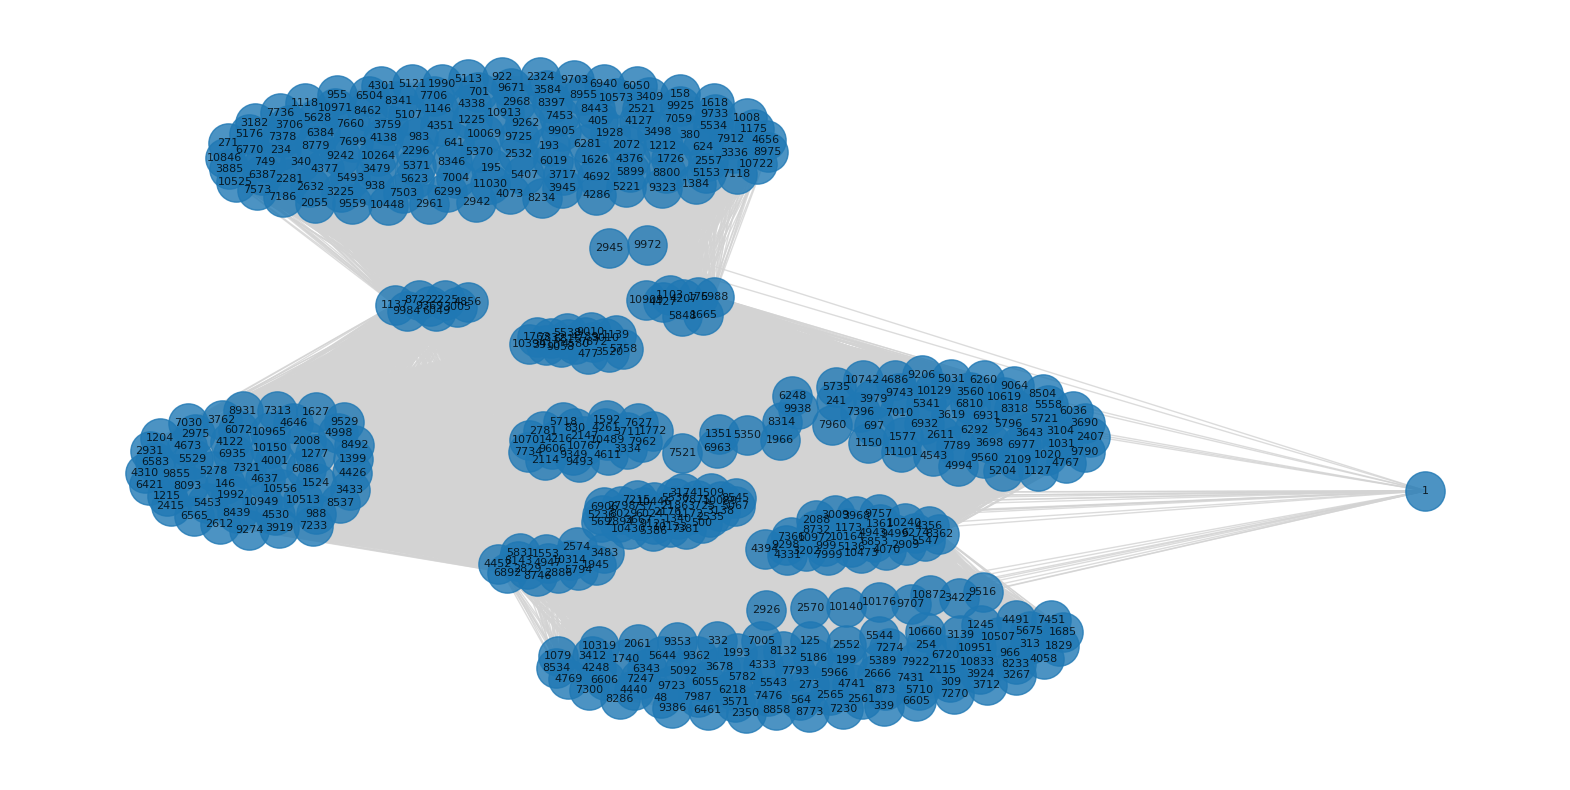

In [65]:
fig, ax = plt.subplots(figsize=(20, 10))

pos = nx.spring_layout(G, weight='weight', k=0.5, seed=10)
node_sizes = 800

nx.draw(G, pos, alpha=0.8, with_labels=True, 
        node_size=node_sizes, edge_color='lightgray', font_size=8)

plt.show()

### Degree Distribution

In [66]:
degree_sequence = [d for n, d in G.degree()]
hist_data = pd.Series(degree_sequence).value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=hist_data.index, y=hist_data.values, marker_color='darkgreen'))
fig.update_layout(width=1300, height=400, xaxis_title='Degree', yaxis_title='Number of Nodes')

fig.show()

degree_dict = dict(G.degree())
top_3_nodes = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:3]

print("Top 3 nodes with the highest degree:")
for node, degree in top_3_nodes:
    print(f"Node: {node}, Degree: {degree}")

degree_values = np.array(degree_sequence)
degree_skewness = skew(degree_values)
degree_kurtosis = kurtosis(degree_values)

print(f"\nDegree Distribution Skewness: {degree_skewness:.4f}")
print(f"Degree Distribution Kurtosis: {degree_kurtosis:.4f}")

Top 3 nodes with the highest degree:
Node: 477, Degree: 375
Node: 3520, Degree: 375
Node: 5758, Degree: 375

Degree Distribution Skewness: 1.3338
Degree Distribution Kurtosis: 0.5820


### Clustering Coefficient

In [67]:

local_clustering = nx.clustering(G)
average_clustering = sum(local_clustering.values()) / len(local_clustering)

clustering_values = list(local_clustering.values())
hist_data = pd.Series(clustering_values).value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=hist_data.index, y=hist_data.values, marker_color='lightcoral'))

fig.update_layout(title=f'<b>Local Clustering Coefficient Distribution (Average: {average_clustering:.4f})</b>', xaxis_title='Clustering Coefficient', yaxis_title='Number of Nodes')

fig.show()

if nx.is_connected(G):
    average_path_length = nx.average_shortest_path_length(G, weight='weight')
    print(f'Average Path Length: {average_path_length:.4f}')
else:
    average_path_length = None

Average Path Length: 1.7191


### Clustering - Louvain

The number of clusters in the graph is: 3
Community 1: 163 nodes
Community 2: 85 nodes
Community 3: 211 nodes


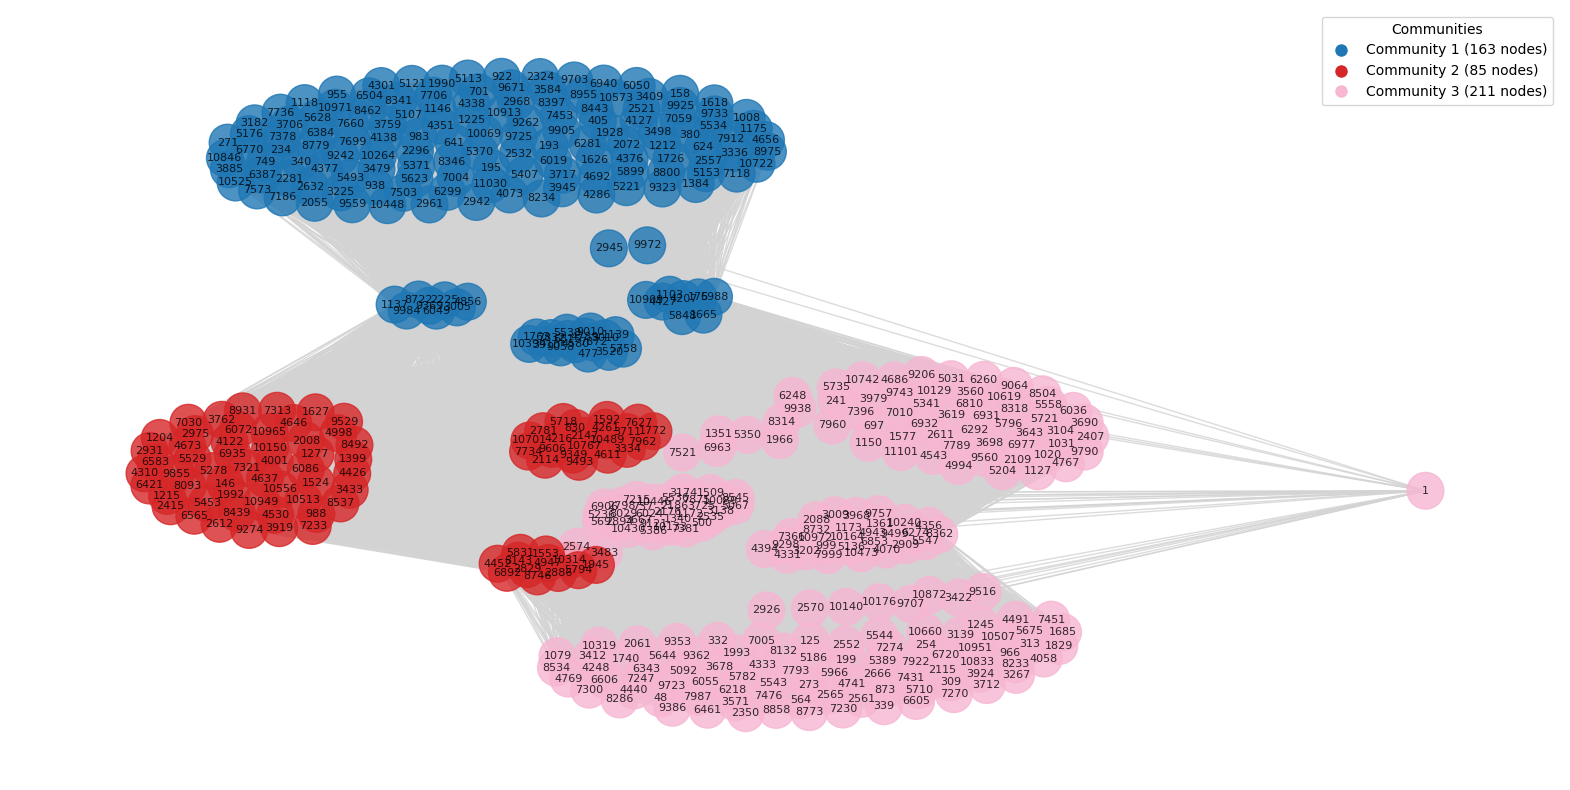

In [68]:
partition = community_louvain.best_partition(G, random_state=2024)
community_counts = Counter(partition.values())

num_clusters = len(community_counts)
print(f'The number of clusters in the graph is: {num_clusters}')
for community, count in sorted(community_counts.items()):
    print(f'Community {community + 1}: {count} nodes')

color_map = {community: plt.cm.tab20(float(i) / num_clusters) for i, community in enumerate(sorted(community_counts.keys()))}
node_colors = [color_map[partition[node]] for node in G.nodes()]

legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Community {community+1} ({count} nodes)', 
                          markerfacecolor=color_map[community], markersize=10) 
                   for community, count in sorted(community_counts.items())]

fig, ax = plt.subplots(figsize=(20, 10))

pos = nx.spring_layout(G, weight='weight', k=0.5, seed=10)
node_sizes = 700

nx.draw(G, pos, alpha=0.8, with_labels=True, 
        node_size=node_sizes, edge_color='lightgray', font_size=8, node_color=node_colors, ax=ax)

ax.legend(handles=legend_elements, loc='best', title="Communities")

plt.show()

In [69]:
nodes_by_community = defaultdict(list)
for node, community in partition.items():
    nodes_by_community[community].append(node)

for community, nodes in sorted(nodes_by_community.items()):
    print(f'Community {community + 1} ({len(nodes)} nodes): {sorted(nodes)}')

Community 1 (163 nodes): [158, 175, 193, 195, 234, 271, 340, 380, 405, 477, 624, 641, 701, 749, 922, 938, 955, 983, 1008, 1103, 1118, 1137, 1139, 1146, 1175, 1212, 1225, 1384, 1618, 1626, 1665, 1726, 1763, 1928, 1990, 2055, 2072, 2225, 2281, 2296, 2324, 2521, 2532, 2557, 2632, 2942, 2945, 2961, 2968, 3005, 3010, 3182, 3225, 3336, 3409, 3479, 3498, 3520, 3584, 3706, 3717, 3759, 3885, 3910, 3945, 4073, 4127, 4138, 4207, 4286, 4301, 4338, 4351, 4376, 4377, 4427, 4580, 4656, 4692, 4789, 4856, 5107, 5113, 5121, 5153, 5176, 5221, 5370, 5371, 5407, 5493, 5534, 5538, 5623, 5628, 5758, 5848, 5899, 6019, 6049, 6050, 6281, 6299, 6384, 6387, 6504, 6770, 6815, 6940, 6988, 7004, 7059, 7118, 7186, 7378, 7453, 7503, 7573, 7660, 7699, 7706, 7736, 7832, 7872, 7912, 8234, 8341, 8346, 8397, 8443, 8462, 8722, 8779, 8800, 8955, 8975, 9010, 9058, 9242, 9262, 9323, 9369, 9559, 9671, 9703, 9725, 9733, 9905, 9925, 9972, 9984, 10069, 10264, 10394, 10448, 10525, 10573, 10722, 10846, 10909, 10913, 10971, 11030]
Co

In [70]:
data = []
for community, nodes in sorted(nodes_by_community.items()):
    data.append({'Community': community + 1, 'Nodes': sorted(nodes)})

df_net_community_list = pd.DataFrame(data)
df_net_community_list

Community                                              Nodes
0          1  [158, 175, 193, 195, 234, 271, 340, 380, 405, ...
1          2  [146, 830, 988, 1204, 1215, 1277, 1399, 1524, ...
2          3  [1, 48, 125, 199, 241, 254, 273, 309, 313, 332...

### Community 1

In [71]:
community1 = df_net_community_list.loc[df_net_community_list['Community'] == 1, 'Nodes'].values[0]

df_net_community1 = df_net[df_net['ID'].isin(community1)]
df_net_community1

ID  Year_Birth  Education  Marital_Status   Income  Children  \
0     5899        1950        3.0             1.0   5648.0         2   
6     2968        1943        3.0             0.0  48948.0         0   
7     2225        1977        1.0             0.0  82582.0         0   
10    9369        1979        2.0             0.0  88194.0         1   
12    7503        1976        1.0             0.0  75825.0         0   
..     ...         ...        ...             ...      ...       ...   
450   7118        1957        1.0             2.0  73803.0         1   
451  10722        1973        1.0             1.0  55593.0         1   
452   2632        1954        1.0             2.0  50501.0         2   
455   4286        1970        3.0             0.0  57642.0         1   
456   7004        1984        1.0             0.0  11012.0         1   

     Dt_Customer_Year  Dt_Customer_Month  Recency  MntWines  MntFruits  \
0                2014                  3       68        28          0   
6                2013                  2       53       437          8   
7                2014                  6       54       510        120   
10               2014                  3       19       688         14   
12               2012                 10       40      1032        105   
..                ...                ...      ...       ...        ...   
450              2012                  8       61       833         80   
451              2013                  8       63       293          8   
452              2013                  6       10       297          0   
455              2014                  1       24       580          6   
456              2013                  3       82        24          3   

     MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                  6                1                 1            13   
6                206              160                49            42   
7                550              156                40           241   
10               309              201                24            38   
12               779              137               105            51   
..               ...              ...               ...           ...   
450              363               52                26           174   
451              124               11                 4           106   
452               38               13                 0           152   
455               58                8                 0            27   
456               26                7                 1            23   

     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                    1                1                    0   
6                    2                7                   10   
7                    1                4                    9   
10                   1               11                   10   
12                   0                5                    8   
..                 ...              ...                  ...   
450                  2                9                    5   
451                  2                6                    6   
452                  7                5                    4   
455                  3                7                    6   
456                  3                3                    1   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
0                    0                 20             0             0   
6                    5                  6             0             0   
7                    7                  1             1             0   
10                  10                  5             1             0   
12                   9                  4             0             0   
..                 ...                ...           ...           ...   
450                  6                  6             0             0   
451                  3  

In [72]:
df_net_community1.loc[:,['Year_Birth', 'Education', 'Marital_Status',
      'Income', 'Children', 'Dt_Customer_Year', 'Dt_Customer_Month',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response']].mean().round(2)

Year_Birth              1971.45
Education                  1.69
Marital_Status             1.00
Income                 50802.58
Children                   0.90
Dt_Customer_Year        2013.06
Dt_Customer_Month          6.33
Recency                   45.70
MntWines                 378.66
MntFruits                 28.39
MntMeatProducts          181.67
MntFishProducts           37.60
MntSweetProducts          27.29
MntGoldProds              66.94
NumDealsPurchases          2.17
NumWebPurchases            4.50
NumCatalogPurchases        3.75
NumStorePurchases          5.01
NumWebVisitsMonth          5.85
Complain                   0.01
Response                   0.47
dtype: float64

In [73]:
df_net_community1['AcceptedCmp'].value_counts().sort_index()

AcceptedCmp
[Cmp1, Cmp2, Cmp3, Cmp5]      3
[Cmp1, Cmp3]                  8
[Cmp1, Cmp3, Cmp5]           13
[Cmp2, Cmp3]                  2
[Cmp2, Cmp3, Cmp5]            2
[Cmp3]                      129
[Cmp3, Cmp5]                  6
Name: count, dtype: int64

In [74]:
df_net_community1['AcceptedCmp'] = ''

def concatenate_accepted_cmp(row):
    accepted_cmp_list = []
    if row['AcceptedCmp1'] == 1:
        accepted_cmp_list.append('Cmp1')
    if row['AcceptedCmp2'] == 1:
        accepted_cmp_list.append('Cmp2')
    if row['AcceptedCmp3'] == 1:
        accepted_cmp_list.append('Cmp3')
    if row['AcceptedCmp4'] == 1:
        accepted_cmp_list.append('Cmp4')
    if row['AcceptedCmp5'] == 1:
        accepted_cmp_list.append('Cmp5')
    return ', '.join(accepted_cmp_list)

df_net_community1['AcceptedCmp'] = df_net_community1.apply(concatenate_accepted_cmp, axis=1)
df_net_community1['AcceptedCmp'].replace('', 'Cmp0', inplace=True)

df_net_community1.head()

ID  Year_Birth  Education  Marital_Status   Income  Children  \
0   5899        1950        3.0             1.0   5648.0         2   
6   2968        1943        3.0             0.0  48948.0         0   
7   2225        1977        1.0             0.0  82582.0         0   
10  9369        1979        2.0             0.0  88194.0         1   
12  7503        1976        1.0             0.0  75825.0         0   

    Dt_Customer_Year  Dt_Customer_Month  Recency  MntWines  MntFruits  \
0               2014                  3       68        28          0   
6               2013                  2       53       437          8   
7               2014                  6       54       510        120   
10              2014                  3       19       688         14   
12              2012                 10       40      1032        105   

    MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 6                1                 1            13   
6               206              160                49            42   
7               550              156                40           241   
10              309              201                24            38   
12              779              137               105            51   

    NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                   1                1                    0   
6                   2                7                   10   
7                   1                4                    9   
10                  1               11                   10   
12                  0                5                    8   

    NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
0                   0                 20             0             0   
6                   5                  6             0             0   
7                   7                  1             1             0   
10                 10                  5             1             0   
12                  9                  4             0             0   

    AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Complain  Response AcceptedCmp  
0              1             0             0         0         0        Cmp3  
6              1             0             0         0         1        Cmp3  
7              1             0             0         0         1  Cmp1, Cmp3  
10             1             0             0         0         1  Cmp1, Cmp3  
12             1             0             0         0         1        Cmp3

### Community 2

In [75]:
community2 = df_net_community_list.loc[df_net_community_list['Community'] == 2, 'Nodes'].values[0]

df_net_community2 = df_net[df_net['ID'].isin(community2)]
df_net_community2

ID  Year_Birth  Education  Marital_Status   Income  Children  \
1    2114        1946        3.0             0.0  82800.0         0   
2    6565        1949        2.0             2.0  76995.0         1   
15   4452        1957        1.0             0.0  50388.0         1   
18   4646        1951        2.0             2.0  78497.0         0   
22   1592        1970        1.0             2.0  90765.0         0   
..    ...         ...        ...             ...      ...       ...   
434  7233        1972        1.0             2.0  69209.0         0   
437  7313        1949        2.0             0.0  74859.0         0   
442  2829        1955        1.0             2.0  65210.0         1   
443  1772        1975        3.0             2.0  79174.0         0   
457  4001        1946        3.0             1.0  64014.0         3   

     Dt_Customer_Year  Dt_Customer_Month  Recency  MntWines  MntFruits  \
1                2012                 11       23      1006         22   
2                2013                  3       91      1012         80   
15               2014                  5        3       292          6   
18               2013                 12       44       207         26   
22               2014                  1       25       547         99   
..                ...                ...      ...       ...        ...   
434              2012                  9        4       496         32   
437              2013                  6       63       570         73   
442              2014                  3       25       626          0   
443              2013                  1        2      1074         37   
457              2014                  6       56       406          0   

     MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
1                115               59                68            45   
2                498                0                16           176   
15                37                0                 3            34   
18               447               75                 0           223   
22               812              151                82            33   
..               ...              ...               ...           ...   
434              849              229                48           128   
437              614              133               102            73   
442               70                0                 7            28   
443              518              193                92           129   
457               30                0                 0             8   

     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1                    1                7                    6   
2                    2               11                    4   
15                   4                6                    1   
18                   1                5                    7   
22                   0                4                    6   
..                 ...              ...                  ...   
434                  2                5                    3   
437                  1                6                    5   
442                  2                9                    3   
443                  1                5                    6   
457                  7                8                    2   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
1                   12                  3             1             0   
2                    9                  5             1             0   
15                   6                  7             1             0   
18                  12                  2             1             0   
22                   5                  1             1             0   
..                 ...                ...           ...           ...   
434                  6                  4             1             0   
437                 11             

In [76]:
df_net_community2.loc[:,['Year_Birth', 'Education', 'Marital_Status',
      'Income', 'Children', 'Dt_Customer_Year', 'Dt_Customer_Month',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response']].mean().round(2)

Year_Birth              1966.04
Education                  1.71
Marital_Status             1.13
Income                 75662.79
Children                   0.33
Dt_Customer_Year        2013.15
Dt_Customer_Month          6.36
Recency                   45.88
MntWines                 684.87
MntFruits                 50.58
MntMeatProducts          407.84
MntFishProducts           97.21
MntSweetProducts          60.78
MntGoldProds              75.71
NumDealsPurchases          1.62
NumWebPurchases            5.82
NumCatalogPurchases        5.64
NumStorePurchases          8.07
NumWebVisitsMonth          3.61
Complain                   0.00
Response                   0.39
dtype: float64

In [77]:
df_net_community2['AcceptedCmp'].value_counts().sort_index()

AcceptedCmp
[Cmp1]          52
[Cmp1, Cmp4]    12
[Cmp1, Cmp5]    21
Name: count, dtype: int64

In [78]:
df_net_community2['AcceptedCmp'] = ''

def concatenate_accepted_cmp(row):
    accepted_cmp_list = []
    if row['AcceptedCmp1'] == 1:
        accepted_cmp_list.append('Cmp1')
    if row['AcceptedCmp2'] == 1:
        accepted_cmp_list.append('Cmp2')
    if row['AcceptedCmp3'] == 1:
        accepted_cmp_list.append('Cmp3')
    if row['AcceptedCmp4'] == 1:
        accepted_cmp_list.append('Cmp4')
    if row['AcceptedCmp5'] == 1:
        accepted_cmp_list.append('Cmp5')
    return ', '.join(accepted_cmp_list)

df_net_community2['AcceptedCmp'] = df_net_community2.apply(concatenate_accepted_cmp, axis=1)
df_net_community2['AcceptedCmp'].replace('', 'Cmp0', inplace=True)

df_net_community2.head()

ID  Year_Birth  Education  Marital_Status   Income  Children  \
1   2114        1946        3.0             0.0  82800.0         0   
2   6565        1949        2.0             2.0  76995.0         1   
15  4452        1957        1.0             0.0  50388.0         1   
18  4646        1951        2.0             2.0  78497.0         0   
22  1592        1970        1.0             2.0  90765.0         0   

    Dt_Customer_Year  Dt_Customer_Month  Recency  MntWines  MntFruits  \
1               2012                 11       23      1006         22   
2               2013                  3       91      1012         80   
15              2014                  5        3       292          6   
18              2013                 12       44       207         26   
22              2014                  1       25       547         99   

    MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
1               115               59                68            45   
2               498                0                16           176   
15               37                0                 3            34   
18              447               75                 0           223   
22              812              151                82            33   

    NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1                   1                7                    6   
2                   2               11                    4   
15                  4                6                    1   
18                  1                5                    7   
22                  0                4                    6   

    NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
1                  12                  3             1             0   
2                   9                  5             1             0   
15                  6                  7             1             0   
18                 12                  2             1             0   
22                  5                  1             1             0   

    AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Complain  Response AcceptedCmp  
1              0             0             1         0         1  Cmp1, Cmp5  
2              0             0             0         0         0        Cmp1  
15             0             1             0         0         1  Cmp1, Cmp4  
18             0             0             0         0         0        Cmp1  
22             0             0             1         0         0  Cmp1, Cmp5

### Community 3

In [79]:
community3 = df_net_community_list.loc[df_net_community_list['Community'] == 3, 'Nodes'].values[0]

df_net_community3 = df_net[df_net['ID'].isin(community3)]
df_net_community3

ID  Year_Birth  Education  Marital_Status   Income  Children  \
3    1993        1949        3.0             2.0  58607.0         1   
4    1966        1965        3.0             2.0  84618.0         0   
5    5710        1970        1.0             1.0  40548.0         1   
8    6260        1955        2.0             1.0  82384.0         0   
9    6853        1982        2.0             0.0  75777.0         0   
..    ...         ...        ...             ...      ...       ...   
447  2666        1972        2.0             2.0  76234.0         1   
448  5721        1956        3.0             2.0  84117.0         0   
453  4333        1954        1.0             1.0  32144.0         2   
454  7366        1982        2.0             0.0  75777.0         0   
458  7270        1981        1.0             0.0  56981.0         0   

     Dt_Customer_Year  Dt_Customer_Month  Recency  MntWines  MntFruits  \
3                2012                 12       63       867          0   
4                2013                 11       96       684        100   
5                2012                 10       31       110          0   
8                2012                 11       55       984         51   
9                2013                  7       12       712         26   
..                ...                ...      ...       ...        ...   
447              2014                  2       21       519         50   
448              2014                  5       60       611         76   
453              2014                  3       76        41          0   
454              2013                  7       12       712         26   
458              2014                  1       91       908         48   

     MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
3                 86                0                 0            19   
4                801               21                66             0   
5                  5                2                 0             3   
8                432              180               120           190   
9                538               69                13            80   
..               ...              ...               ...           ...   
447              167              130                 0            41   
448              749               59                45            26   
453               10                0                 0             3   
454              538               69                13            80   
458              217               32                12            24   

     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
3                    3                2                    3   
4                    1                6                    9   
5                    2                2                    1   
8                    1                3                   10   
9                    1                3                    6   
..                 ...              ...                  ...   
447                  1                8                    3   
448                  1                7                   10   
453                  4                2                    1   
454                  1                3                    6   
458                  1                2                    3   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
3                    9                  8             0             0   
4                   10                  2             0             0   
5                    4                  5             0             0   
8                   13                  1             0             0   
9                   11                  1             0             0   
..                 ...                ...           ...           ...   
447                 11                  3             0             0   
448                  6             

In [80]:
df_net_community3.loc[:,['Year_Birth', 'Education', 'Marital_Status',
      'Income', 'Children', 'Dt_Customer_Year', 'Dt_Customer_Month',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response']].mean().round(2)

Year_Birth              1966.27
Education                  1.76
Marital_Status             1.03
Income                 72228.22
Children                   0.54
Dt_Customer_Year        2013.02
Dt_Customer_Month          6.19
Recency                   50.78
MntWines                 762.68
MntFruits                 36.70
MntMeatProducts          320.04
MntFishProducts           51.32
MntSweetProducts          41.28
MntGoldProds              55.90
NumDealsPurchases          2.01
NumWebPurchases            5.54
NumCatalogPurchases        4.56
NumStorePurchases          8.09
NumWebVisitsMonth          4.28
Complain                   0.00
Response                   0.36
dtype: float64

In [81]:
df_net_community3['AcceptedCmp'].value_counts().sort_index()

AcceptedCmp
[Cmp1, Cmp2, Cmp4]           2
[Cmp1, Cmp2, Cmp4, Cmp5]     8
[Cmp1, Cmp4, Cmp5]          23
[Cmp2]                       1
[Cmp2, Cmp4]                 8
[Cmp2, Cmp4, Cmp5]           4
[Cmp4]                      83
[Cmp4, Cmp5]                24
[Cmp5]                      58
Name: count, dtype: int64

In [82]:
df_net_community3['AcceptedCmp'] = ''

def concatenate_accepted_cmp(row):
    accepted_cmp_list = []
    if row['AcceptedCmp1'] == 1:
        accepted_cmp_list.append('Cmp1')
    if row['AcceptedCmp2'] == 1:
        accepted_cmp_list.append('Cmp2')
    if row['AcceptedCmp3'] == 1:
        accepted_cmp_list.append('Cmp3')
    if row['AcceptedCmp4'] == 1:
        accepted_cmp_list.append('Cmp4')
    if row['AcceptedCmp5'] == 1:
        accepted_cmp_list.append('Cmp5')
    return ', '.join(accepted_cmp_list)

df_net_community3['AcceptedCmp'] = df_net_community3.apply(concatenate_accepted_cmp, axis=1)
df_net_community3['AcceptedCmp'].replace('', 'Cmp0', inplace=True)

df_net_community3.head()

ID  Year_Birth  Education  Marital_Status   Income  Children  \
3  1993        1949        3.0             2.0  58607.0         1   
4  1966        1965        3.0             2.0  84618.0         0   
5  5710        1970        1.0             1.0  40548.0         1   
8  6260        1955        2.0             1.0  82384.0         0   
9  6853        1982        2.0             0.0  75777.0         0   

   Dt_Customer_Year  Dt_Customer_Month  Recency  MntWines  MntFruits  \
3              2012                 12       63       867          0   
4              2013                 11       96       684        100   
5              2012                 10       31       110          0   
8              2012                 11       55       984         51   
9              2013                  7       12       712         26   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
3               86                0                 0            19   
4              801               21                66             0   
5                5                2                 0             3   
8              432              180               120           190   
9              538               69                13            80   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
3                  3                2                    3                  9   
4                  1                6                    9                 10   
5                  2                2                    1                  4   
8                  1                3                   10                 13   
9                  1                3                    6                 11   

   NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
3                  8             0             0             0             1   
4                  2             0             0             0             0   
5                  5             0             0             0             1   
8                  1             0             0             0             0   
9                  1             0             0             0             1   

   AcceptedCmp5  Complain  Response AcceptedCmp  
3             0         0         0        Cmp4  
4             1         0         0        Cmp5  
5             0         0         0        Cmp4  
8             1         0         1        Cmp5  
9             1         0         1  Cmp4, Cmp5

### Campaign

In [83]:
community1_counts = {
    'Cmp1': df_net_community1['AcceptedCmp1'].value_counts().get(1,0),
    'Cmp2': df_net_community1['AcceptedCmp2'].value_counts().get(1,0),
    'Cmp3': df_net_community1['AcceptedCmp3'].value_counts().get(1,0),
    'Cmp4': df_net_community1['AcceptedCmp4'].value_counts().get(1,0),
    'Cmp5': df_net_community1['AcceptedCmp5'].value_counts().get(1,0)
}

df_net_community1_counts = pd.DataFrame(list(community1_counts.items()), columns=['Campaign', 'Count'])
df_net_community1_counts = df_net_community1_counts.set_index("Campaign")

fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.10)

fig.add_trace(px.histogram(df_net_community1, 'AcceptedCmp').data[0], row=1, col=1)
fig.add_trace(px.bar(df_net_community1_counts['Count']).data[0], row=1, col=2)

fig.update_layout(width=1300, height=400, title_text="<b>Community 1</b>", bargap=0.3, showlegend=False)
fig.update_xaxes(type='category', categoryorder='category ascending', row=1, col=1)
fig.update_xaxes(tickangle=45, row=1, col=1)

fig.show()

In [84]:
community2_counts = {
    'Cmp1': df_net_community2['AcceptedCmp1'].value_counts().get(1,0),
    'Cmp2': df_net_community2['AcceptedCmp2'].value_counts().get(1,0),
    'Cmp3': df_net_community2['AcceptedCmp3'].value_counts().get(1,0),
    'Cmp4': df_net_community2['AcceptedCmp4'].value_counts().get(1,0),
    'Cmp5': df_net_community2['AcceptedCmp5'].value_counts().get(1,0)
}

df_net_community2_counts = pd.DataFrame(list(community2_counts.items()), columns=['Campaign', 'Count'])
df_net_community2_counts = df_net_community2_counts.set_index("Campaign")

fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.10)

fig.add_trace(px.histogram(df_net_community2, 'AcceptedCmp').data[0], row=1, col=1)
fig.add_trace(px.bar(df_net_community2_counts['Count']).data[0], row=1, col=2)

fig.update_traces(marker_color=px.colors.qualitative.Plotly[1])
fig.update_layout(width=1300, height=400, title_text="<b>Community 2</b>", bargap=0.3, showlegend=False)
fig.update_xaxes(type='category', categoryorder='category ascending', row=1, col=1)
fig.update_xaxes(tickangle=45, row=1, col=1)

fig.show()

In [85]:
community3_counts = {
    'Cmp1': df_net_community3['AcceptedCmp1'].value_counts().get(1,0),
    'Cmp2': df_net_community3['AcceptedCmp2'].value_counts().get(1,0),
    'Cmp3': df_net_community3['AcceptedCmp3'].value_counts().get(1,0),
    'Cmp4': df_net_community3['AcceptedCmp4'].value_counts().get(1,0),
    'Cmp5': df_net_community3['AcceptedCmp5'].value_counts().get(1,0)
}

df_net_community3_counts = pd.DataFrame(list(community3_counts.items()), columns=['Campaign', 'Count'])
df_net_community3_counts = df_net_community3_counts.set_index("Campaign")

fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.10)

fig.add_trace(px.histogram(df_net_community3, 'AcceptedCmp').data[0], row=1, col=1)
fig.add_trace(px.bar(df_net_community3_counts['Count']).data[0], row=1, col=2)

fig.update_traces(marker_color=px.colors.qualitative.Plotly[6])
fig.update_layout(width=1300, height=400, title_text="<b>Community 3</b>", bargap=0.3, showlegend=False)
fig.update_xaxes(type='category', categoryorder='category ascending', row=1, col=1)
fig.update_xaxes(tickangle=45, row=1, col=1)

fig.show()

### Influencer Detection

In [86]:
community_nodes = defaultdict(list)
for node, comm in partition.items():
    community_nodes[comm].append(node)

community_influencers = {}

for comm, nodes in community_nodes.items():
    subgraph = G.subgraph(nodes)

    degree_centrality = nx.degree_centrality(subgraph)
    betweenness_centrality = nx.betweenness_centrality(subgraph)
    closeness_centrality = nx.closeness_centrality(subgraph)
    pagerank = nx.pagerank(subgraph)

    sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
    sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
    sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

    top_degree = sorted_degree[:5]
    top_betweenness = sorted_betweenness[:5]
    top_closeness = sorted_closeness[:5]
    top_pagerank = sorted_pagerank[:5]

    influencers_list = []

    print(f"\nTop Influencers in Community {comm + 1} by Degree Centrality:")
    for node, score in top_degree:
        influencers_list.append(node)
        print(f'Node {node} with Degree Centrality score {score}')

    print(f"\nTop Influencers in Community {comm + 1} by Betweenness Centrality:")
    for node, score in top_betweenness:
        influencers_list.append(node)
        print(f'Node {node} with Betweenness Centrality score {score}')

    print(f"\nTop Influencers in Community {comm + 1} by Closeness Centrality:")
    for node, score in top_closeness:
        influencers_list.append(node)
        print(f'Node {node} with Closeness Centrality score {score}')
    
    print(f"\nTop Influencers in Community {comm + 1} by PageRank:")
    for node, score in top_pagerank:
        influencers_list.append(node)
        print(f'Node {node} with PageRank score {score}')
    
    community_influencers[comm] = influencers_list

community1_influencers_list = community_influencers.get(0, [])
community2_influencers_list = community_influencers.get(1, [])
community3_influencers_list = community_influencers.get(2, [])


Top Influencers in Community 3 by Degree Centrality:
Node 9757 with Degree Centrality score 1.0
Node 2088 with Degree Centrality score 1.0
Node 3138 with Degree Centrality score 1.0
Node 3174 with Degree Centrality score 1.0
Node 3725 with Degree Centrality score 1.0

Top Influencers in Community 3 by Betweenness Centrality:
Node 9757 with Betweenness Centrality score 0.004655554935337579
Node 2088 with Betweenness Centrality score 0.004655554935337579
Node 3138 with Betweenness Centrality score 0.004655554935337579
Node 3174 with Betweenness Centrality score 0.004655554935337579
Node 3725 with Betweenness Centrality score 0.004655554935337579

Top Influencers in Community 3 by Closeness Centrality:
Node 9757 with Closeness Centrality score 1.0
Node 2088 with Closeness Centrality score 1.0
Node 3138 with Closeness Centrality score 1.0
Node 3174 with Closeness Centrality score 1.0
Node 3725 with Closeness Centrality score 1.0

Top Influencers in Community 3 by PageRank:
Node 3138 with 

In [87]:
community1_influencers_list = sorted(list(set(community1_influencers_list)))
community2_influencers_list = sorted(list(set(community2_influencers_list)))
community3_influencers_list = sorted(list(set(community3_influencers_list)))

print(community1_influencers_list)
print(community2_influencers_list)
print(community3_influencers_list)

[477, 2055, 3520, 3584, 5121, 5758, 7832, 8722, 9733, 10394]
[1553, 1592, 2114, 4122, 4611, 4637, 7734, 10767]
[2088, 3138, 3174, 3725, 8545, 9757, 10089]
